In [1]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
import datetime 


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [4]:
def showres(band,step,display = False,cp =False):
    pa = '/home/simonste/research/xrb/data/'
    if band == 'g' or band == 'r' or band == 'i' or band == 'z':
        data_path = pa + 'input%s.txt'%band
    else:
        data_path = pa + 'input%snew0102.txt'%band
    data = XYLike.from_text_file("%sdata"%band, data_path)
    data.assign_to_source(source_name = 'Xrb_%sband_source'%band)
    #resultsingle = load_analysis_results('../XrbHSESDsizeinclonly%s0602Multinest.fits'%band)
    resultsingle = load_analysis_results('HSESDsizeincl0102_2.fits')
    #resultsingle = load_analysis_results('../XrbHSESDsizenew_3bands_Multinest.fits'%band)
    #resultsingle =load_analysis_results('HSESsingleJnewEMCEE.fits')
    if display == True:
        resultsingle.display()
    if cp == True:
        resultsingle.corner_plot();
    my_modelsing = resultsingle.optimized_model
    time_start = time.time()
    phases = np.arange(0.01,1.01,0.01)
    fig, ax = plt.subplots(figsize=(15,9))
    with use_astromodels_memoization(False):
        for  ev,parameterset in enumerate(resultsingle.samples.T[::step]): 
            compplot2(my_modelsing,data,phases,parameterset,ax,ev,band)
    
    
    ax.set_xlabel(r"Phase $\theta$",fontsize =20)
    ax.legend(fontsize =25,loc = 1)
    ax.set_ylabel("Magnitude [AB]",fontsize =20)
    ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
    plt.gca().invert_yaxis()
    plt.savefig("../plots/single%s%smultiLC.pdf"%(band,datetime.date.today()))
    time_stop = time.time()
    print ('took %s seconds'%(time_stop-time_start))


In [5]:
def  compplot2(my_model,data,phases,params,ax,i,band):
    
    #bands_data = [gdata,rdata,idata,zdata,Jdata,Hdata,Kdata]
    bands_data = [data]
    #lColor = ['goldenrod']
    lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    for it,(name,par) in enumerate(my_model.free_parameters.iteritems()):
        par.value = params[it]
    
    
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Inkl.value = params[0]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Dtemp.value  =params[1]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.T_sec.value = params[5]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Dsize.value  =params[7]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSTemp.value =params[2]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSWidth.value = params[3]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSAwidth.value  = params[4]
    #my_modelsing.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.distfac.value  =params[6]
    
    
    if band == 'g':
        farbe = lColor[0]
    elif band == 'r':
        farbe = lColor[1]
    elif band == 'i':
        farbe = lColor[2]
    elif band == 'z':
        farbe = lColor[3]
    elif band == 'J':
        farbe = lColor[4]
    elif band == 'H':
        farbe = lColor[5]
    elif band == 'K':
        farbe = lColor[6]
    else:
        print 'wrong band'
    #modlist = [modelg,modelr,modeli,modelz,modelJ,modelH,modelK]
    for co,(source_name, point_source) in enumerate(my_model.point_sources.iteritems()):
        if source_name == 'Xrb_%sband_source'%band:
            ax.plot(phases,point_source.spectrum.main.shape(phases),
                '-',c = farbe,alpha=0.5,lw=.5)#,label= "%s" %(point_source))
                
        
        

    co = 0
    if i == 0:
        for band in bands_data:
            ax.errorbar(band.x,band.y,yerr = band.yerr, fmt ='.', label = 'GROND '  + band.get_name()[0],c = farbe)
            co+=1

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2960.6812911 seconds
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2231.7732501 seconds
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2823.02802396 seconds
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2224.15674901 seconds


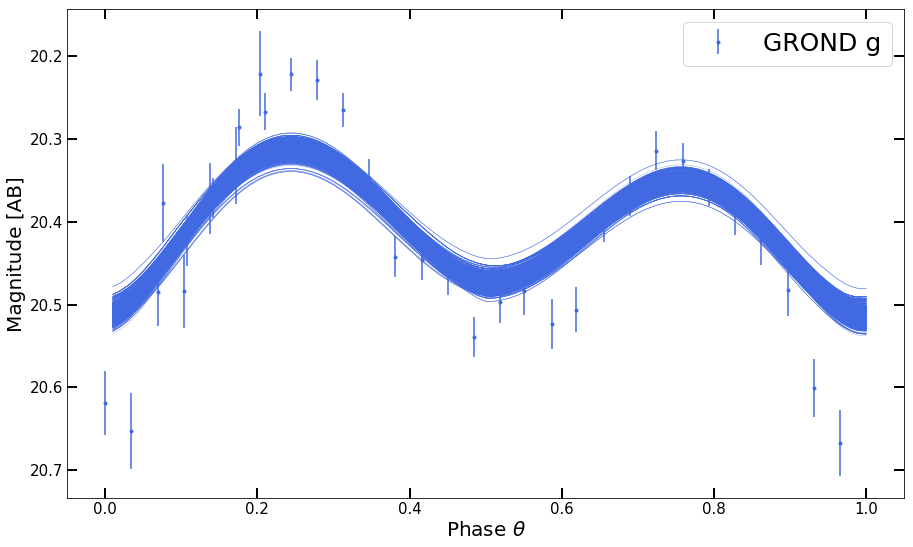

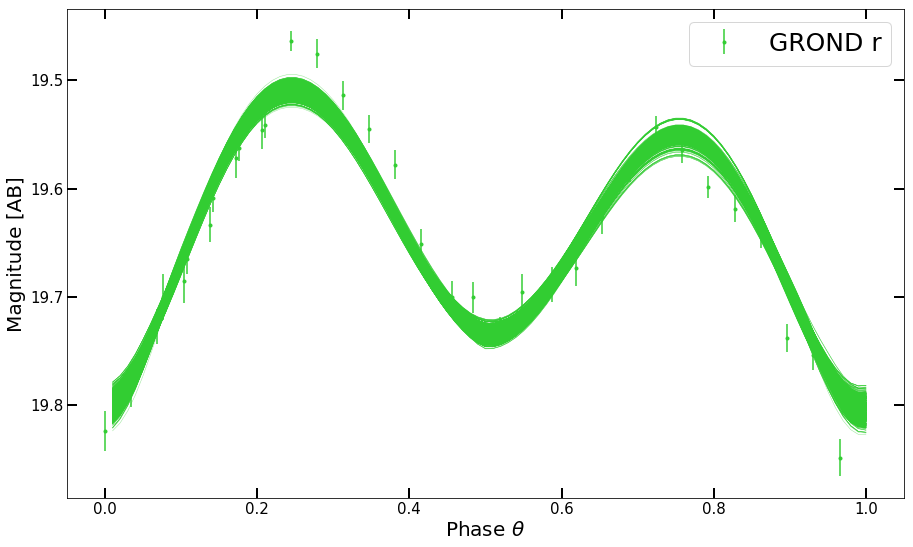

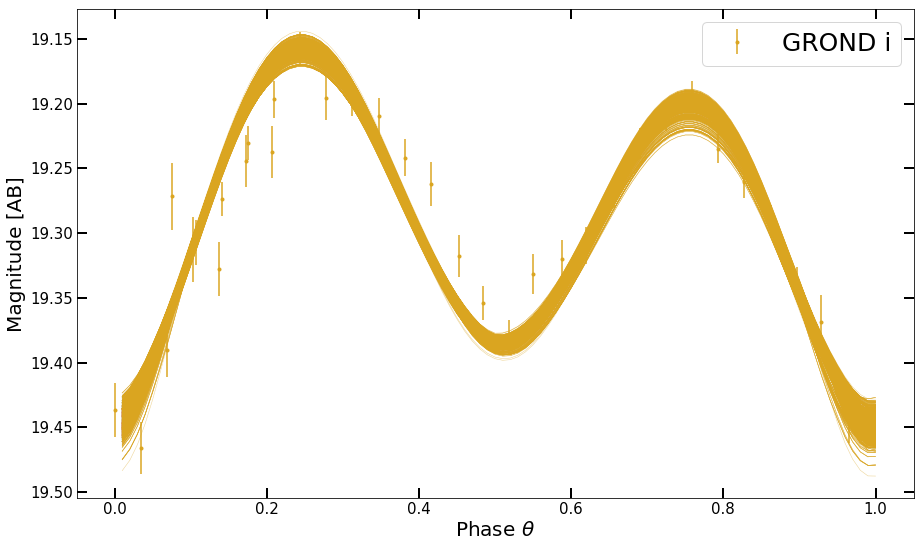

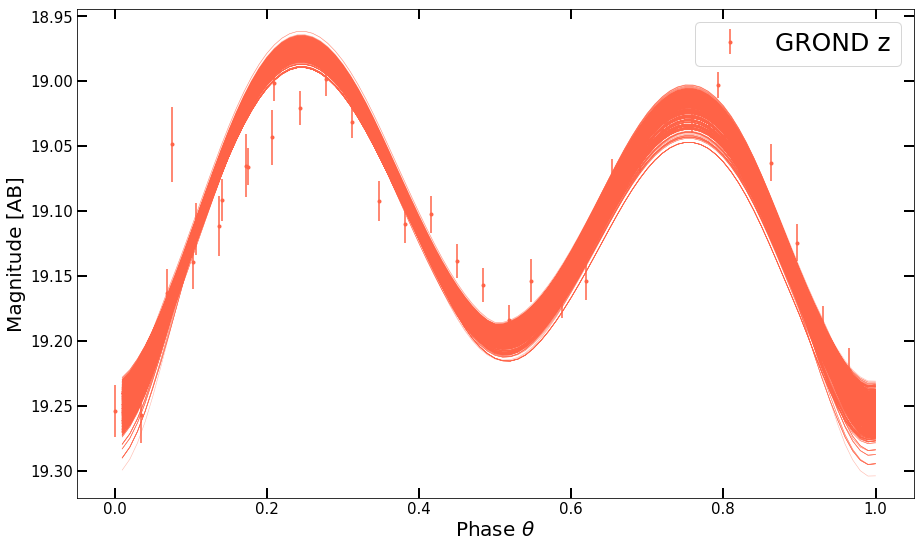

In [9]:
showres('g',10)
showres('r',10)
showres('i',10)
showres('z',10)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 1450.89728999 seconds


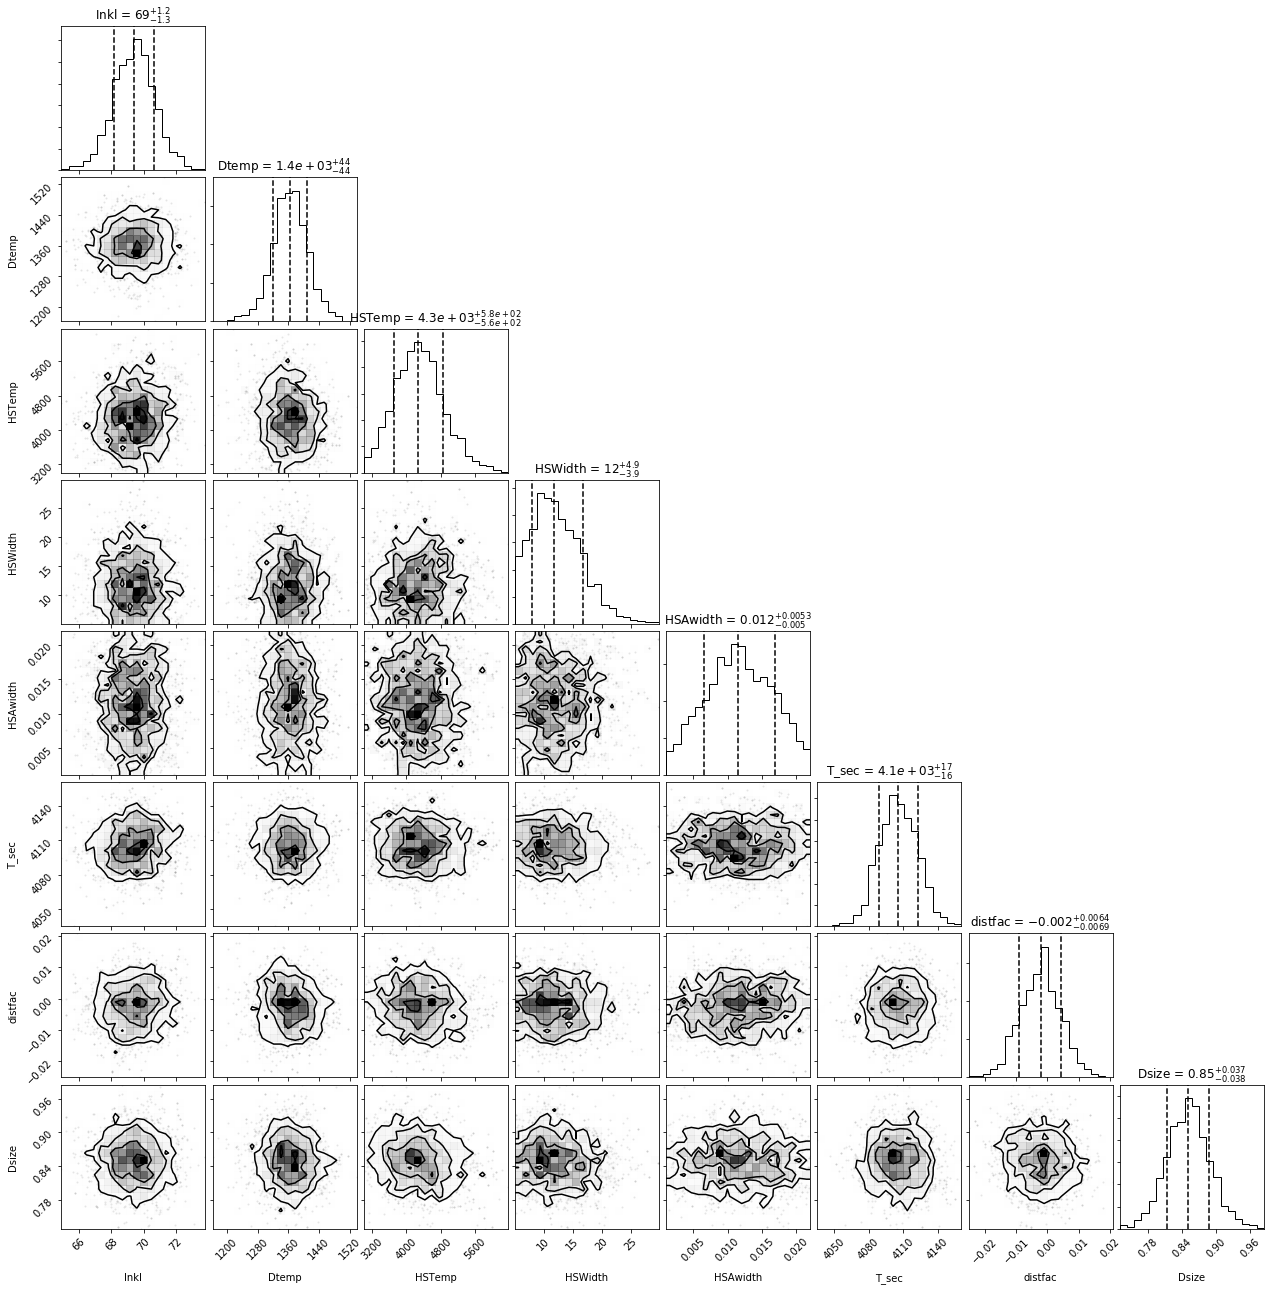

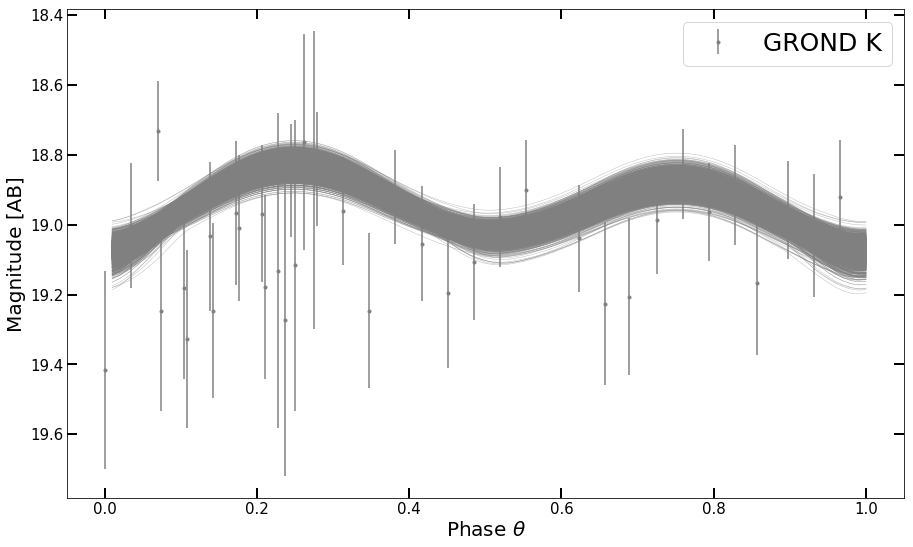

In [33]:
showres('K',1,cp = True)


2019-02-07


Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2625.25836492 seconds


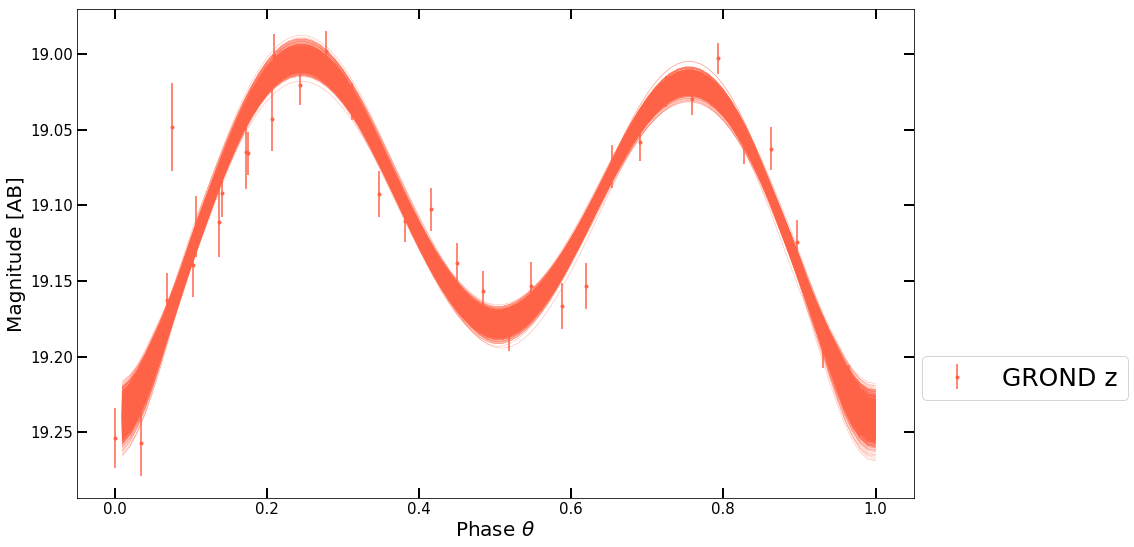

In [13]:
showres('z',1)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 4987.79861593 seconds


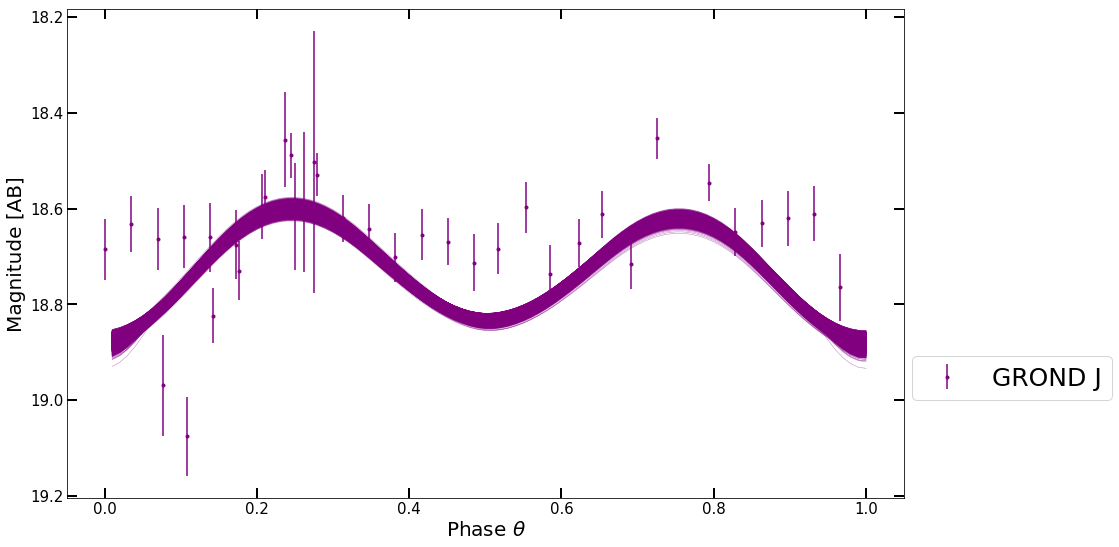

In [15]:
showres('J',1)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 4051.54570794 seconds


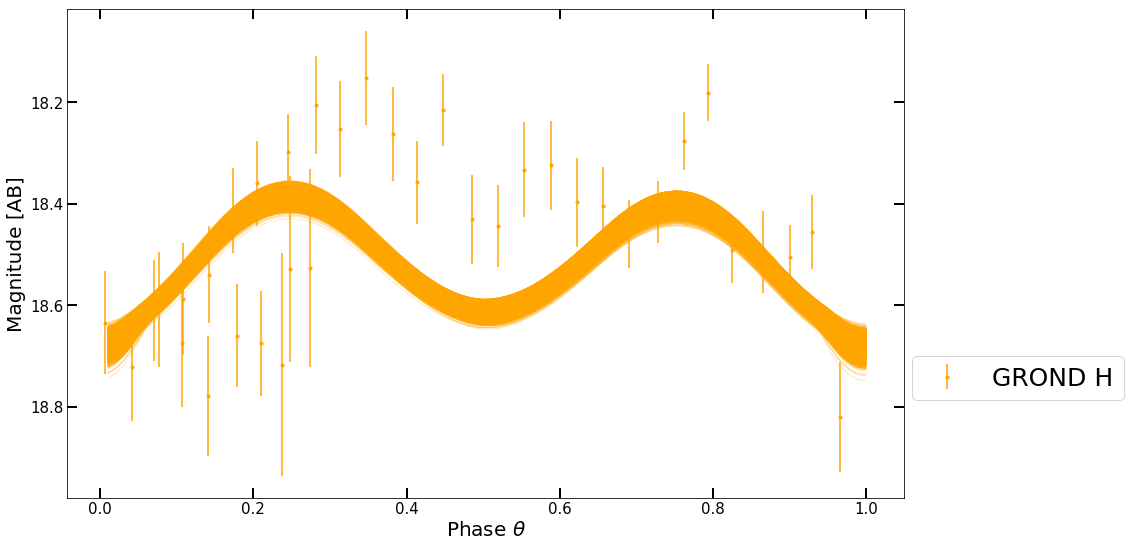

In [17]:
showres('H',1)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2156.88531184 seconds


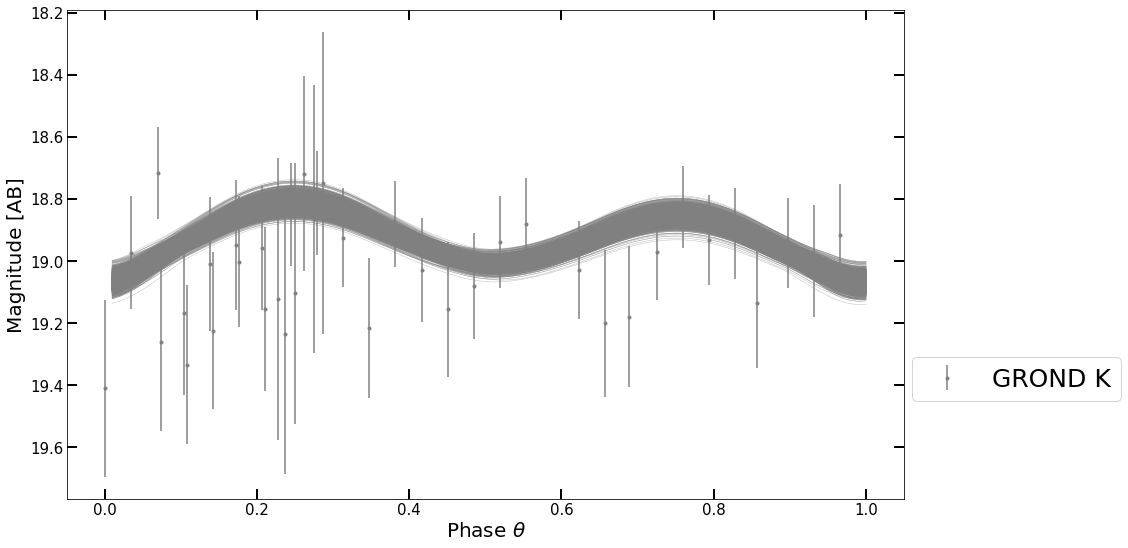

In [11]:
showres('K',1)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
took 2061.94648504 seconds


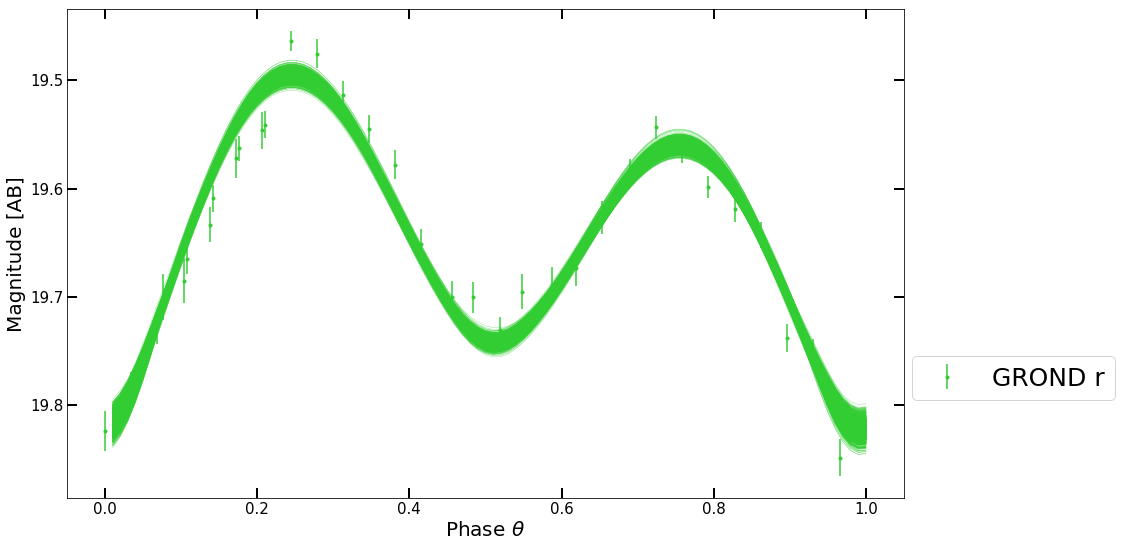

In [15]:
showres('r',1)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Maximum a posteriori probability (MAP) point:




WARNING RuntimeWarning: divide by zero encountered in log10


WARNING RuntimeWarning: divide by zero encountered in log10



,result,unit
parameter,,
Xrb_Hband_source...Inkl,(7.160 +/- 0.06) x 10,
Xrb_Hband_source...Dtemp,(1.000 +/- 0) x 10^3,
Xrb_Hband_source...HSTemp,(3.060 +/- 0.05) x 10^3,
Xrb_Hband_source...HSWidth,(1.5 -0.8 +0.9) x 10,
Xrb_Hband_source...HSAwidth,(1.100 +/- 0.7) x 10^-2,
Xrb_Hband_source...T_sec,(4.007 +/- 0.005) x 10^3,
Xrb_Hband_source...distfac,(-9.320 +/- 0.22) x 10^-2,
Xrb_Hband_source...Dsize,(7.286 +/- 0.029) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
Hdata,-201.276699
total,-201.276699



Values of statistical measures:



,statistical measures
AIC,424.091860
BIC,430.996183
DIC,410.496101
PDIC,0.418995
log(Z),-102.050763


took 241.792547941 seconds


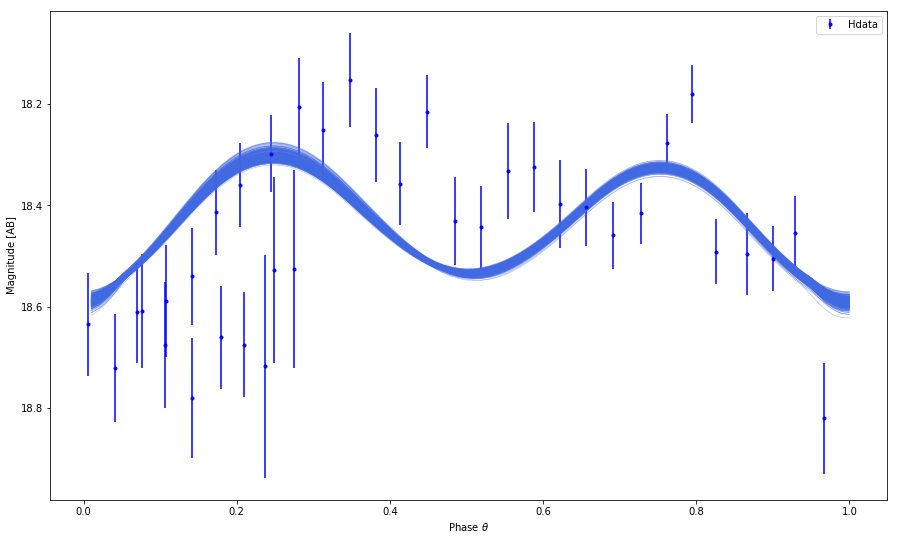

In [9]:
showres('H',10,display=True)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
Xrb_Jband_source...Inkl,(7.180 +/- 0.06) x 10,
Xrb_Jband_source...Dtemp,(1.215 -0.017 +0.015) x 10^3,
Xrb_Jband_source...HSTemp,(3.100 +/- 0.07) x 10^3,
Xrb_Jband_source...HSWidth,9.0 -3.1 +3.2,
Xrb_Jband_source...HSAwidth,(1.3 -0.7 +0.6) x 10^-2,
Xrb_Jband_source...T_sec,(4.006 +/- 0.004) x 10^3,
Xrb_Jband_source...distfac,(-9.000 +/- 0.5) x 10^-2,
Xrb_Jband_source...Dsize,(7.279 +/- 0.022) x 10^-1,



Values of -log(posterior) at the minimum:



,-log(posterior)
Jdata,-104.034477
total,-104.034477



Values of statistical measures:



,statistical measures
AIC,229.402288
BIC,236.737106
DIC,220.979993
PDIC,1.111291
log(Z),-60.416179


took 5159.63243008 seconds


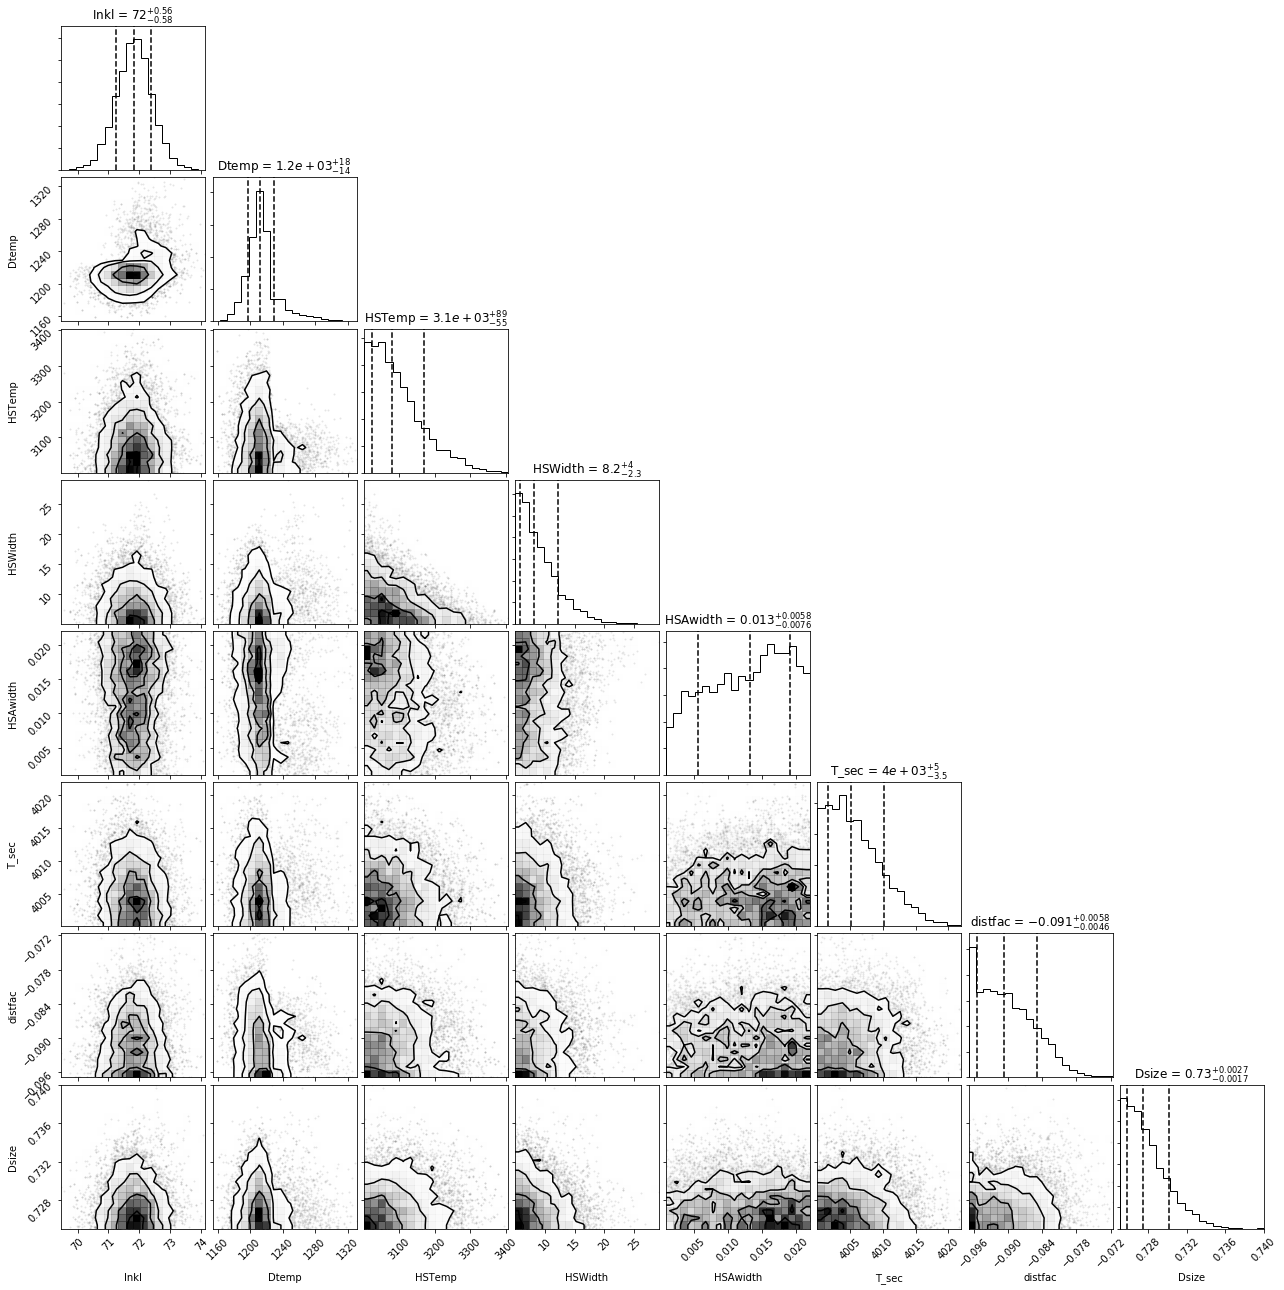

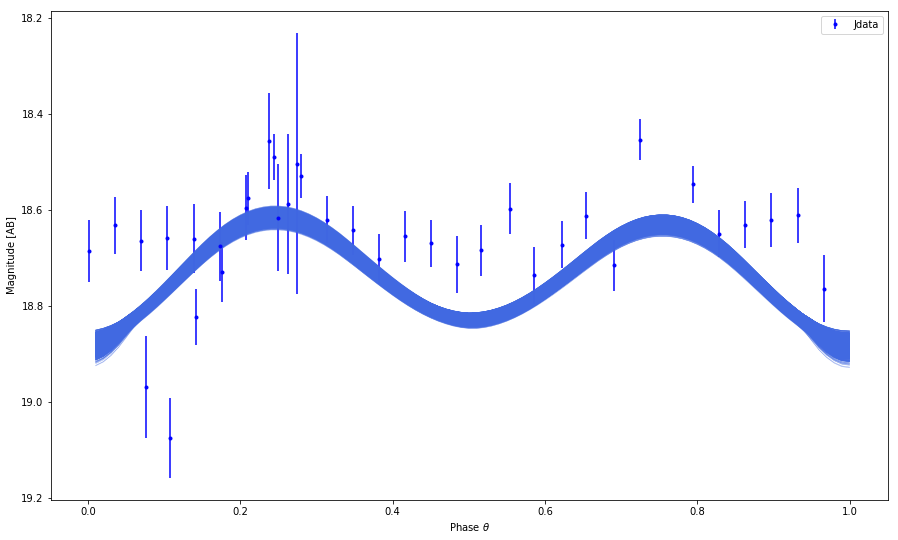

In [8]:
showres('J',1,display=True,cp = True)

In [10]:
showres('H',100,cp = True)

Using Gaussian statistic (equivalent to chi^2) with the provided errors.


ValueError: It looks like the parameter(s) in column(s) 1 have no dynamic range. Please provide a `range` argument.